# Calorimeter Clusters Collection

A jet is built from these clusters. Lets take a dive into the raw versions.

In [1]:
import matplotlib.pyplot as plt
from config import ds_zee as ds

Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.
Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.
Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.
Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.
Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.


There are several `CaloCluster` collections. For this we'll go after `egammaClusters`.

In [2]:
clusters = (ds
            .SelectMany(lambda e: e.CaloClusters('egammaClusters'))
            .Select(lambda cluster: cluster.pt() / 1000.0)
            .AsAwkwardArray('ClusterPt')
            .value())

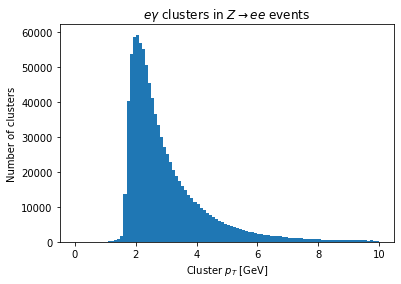

In [3]:
plt.hist(clusters.ClusterPt, bins=100, range=(0, 10))
plt.xlabel('Cluster $p_T$ [GeV]')
plt.ylabel('Number of clusters')
_ = plt.title(r'$e\gamma$ clusters in $Z\rightarrow ee$ events')

## The Datamodel

The data model when this documentation was last built was:

In [4]:
from func_adl_servicex_xaodr21.xAOD.calocluster_v1 import CaloCluster_v1
help(CaloCluster_v1)

Help on class CaloCluster_v1 in module func_adl_servicex_xaodr21.xAOD.calocluster_v1:

class CaloCluster_v1(builtins.object)
 |  A class
 |  
 |  Methods defined here:
 |  
 |  badChannelList(self) -> 'func_adl_servicex_xaodr21.vector_xaod_caloclusterbadchanneldata_v1_.vector_xAOD_CaloClusterBadChannelData_v1_'
 |      A method
 |  
 |  clearDecorations(self) -> 'bool'
 |      A method
 |  
 |  e(self) -> 'float'
 |      A method
 |  
 |  energyBE(self, layer: 'int') -> 'float'
 |      A method
 |  
 |  et(self) -> 'float'
 |      A method
 |  
 |  eta(self) -> 'float'
 |      A method
 |  
 |  etaBE(self, layer: 'int') -> 'float'
 |      A method
 |  
 |  getClusterEtaSize(self) -> 'int'
 |      A method
 |  
 |  getClusterPhiSize(self) -> 'int'
 |      A method
 |  
 |  getSisterCluster(self) -> 'func_adl_servicex_xaodr21.xAOD.calocluster_v1.CaloCluster_v1'
 |      A method
 |  
 |  hasNonConstStore(self) -> 'bool'
 |      A method
 |  
 |  hasStore(self) -> 'bool'
 |      A method
 

## Further Information

* The [`xAOD::CaloCluster_v1` C++ header file](https://gitlab.cern.ch/atlas/athena/-/blob/21.2/Event/xAOD/xAODCaloEvent/xAODCaloEvent/versions/CaloCluster_v1.h) with all the inline documentation.